# Foreign Exchange Rate Data Cleaning

Datafile: "14_Foreign_Exchange_Rates _WithErrors.csv"

2020-10-20 - Jingwei Liu

In [1]:
#import the tools:numpy,pandas and matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## At the beginning, understanding the data is very important
If you know the meaning of each column, the data type of each column, the range of each column(if applicable), all those can give you a great help in cleaning the data

## First, let's read the data as a pandas dataframe
Generally, pandas dataframe can provide an easy way for us to check the data. After learning the pandas dataframe, you should know that the columns of a pandas dataframe are homogeneous (if type), which means all cells in a same column have the same data type.

In [2]:
# Read the dataset as a dataframe
fname = "../data/14_Foreign_Exchange_Rates _WithErrors.csv"
df = pd.read_csv(fname)
df.head()

,Index,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,1/3/2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,1/4/2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,1/5/2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,1/6/2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,1/7/2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


We can find that the first column should be index and the second column should be a date. And all other columns are numbers because they are exchange rates.

## Then, let's check whether all cells in the exchange rates are numbers
Generally, we should clean the data column by column rather than row by row. Let's take the column "AUSTRALIA - AUSTRALIAN DOLLAR/US$" as an example

In [3]:
# Check the data type of the column. We can just check the first element in the column.
type(df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'][1])

str

In [4]:
# OR you can use describe function to check the datatype
df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].describe()

count     5217
unique    2960
top         ND
freq       198
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, dtype: object

Based on our understanding of the data, the data type of the cell should be a number(float) rather than a string(str). In addition, according to this result, we should notice that there are cells which contain some non-number-string values(ND). Now, let's first find those non-number-strings.

## So, how to find the non-number-strings 
### Assume we have two strings: '123' and 'abc'. how can we distinguish them?
In Python, '123' can be convert to a number(float). 

In [5]:
str1 = '123'
str2 = 'abc'

In [6]:
float(str1)

123.0

In [7]:
float(str2)

ValueError: could not convert string to float: 'abc'

In [8]:
try:
    float(str2)
except ValueError:
    print('could not convert string {} to float'.format(str2))

could not convert string abc to float


You can see that we can use float() function to help us distinguish non-number-strings. And the "try except" structure is very powerful in Python. 

## Now, let's try to locate the cells that contain non-number-strings
Let's define a function that can return indices of the cells contain non-number-strings

In [9]:
# Define the function that returns indices the non-number strings
# column : a column from a dataframe
def CheckIfNumInCol(column):
    # create a empty list to store the element index 
    indexlist = []
    # from the start to the end
    for i in range(column.count()):
        # check whether float() function is working
        try:
            float(column[i])
        except ValueError:
            # if float() is not working, that cell contain non-number string. Then, we add the cell's index to the list
            indexlist.append(i)        
    return(indexlist)

In [10]:
# Use the above function and get the indices of non-number strings and use the indices list to filter those values out
resultlist = CheckIfNumInCol(df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'][resultlist]

10       ND
35       ND
89      ABC
105      ND
131      ND
       ... 
5130     ND
5160     ND
5180     ND
5193     ND
5212     ND
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 199, dtype: object

Based on the result, we can find that there are 199 cells that contain non-number-strings

## Before we move next, you should think about this question: are there perticular meanings for these non-number-strings? Are they supposed to be a number-string? These questions are important because it will affect how you deal with this non-number-strings.
### For this perticular data, if you open the csv file and find the rows that contain 'ND', you'll find that their date are all holidays. So, there comes 2 situations: 1. There should be no data in holidays  2. The data provider doesn't record exchange rate during holidays. You need to make a decision.
###  For the 89th row that contains 'ABC', this should be a number-string originally.

## After finding the non-number-strings, all left are number-strings. But how can we know that the cells that contain number-strings are correct?
For different data, there is no universal rule to judge wheteher it is correct or not. As indicated at the begining of this code, understanding the data will help you make the decision. For this exchange rate data, here, we will plot the rate values to check if there are abnormal values.
Let's first convert those number-strings to float 

In [14]:
# get the index list of the dataframe
dflist = list(df.index)

In [15]:
# substract the non-number-strings indices from the above list
leftlist = [item for item in dflist if item not in resultlist]

In [16]:
# an alternative way to find the number-string indices
leftlist= list(set(dflist).difference(resultlist))

In [17]:
# convert the number-strings to numbers
leftdf = df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'][leftlist]
leftdf = leftdf.apply(lambda x: float(x))
# check the data type 
leftdf.dtype

dtype('float64')

### Now we can do the plot to check the values

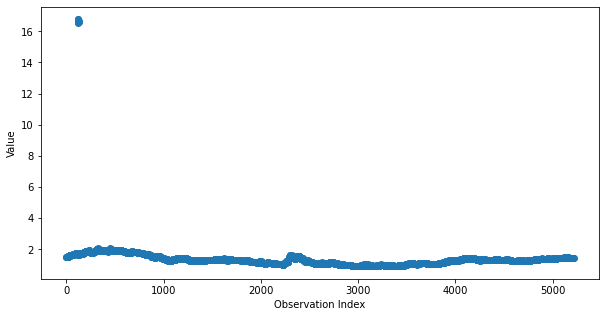

In [18]:
# modify the figure size
plt.rcParams['figure.figsize'] = (10.0, 5.0)
# do plot
plt.plot(leftdf,'o');
# add x and y axis label
plt.xlabel('Observation Index');
plt.ylabel('Value');

According to the plot, you should find that most values are around 2 but between index 0 to 1000, there is a peak which is greater than 16. We can also use histogram plot to check this. 

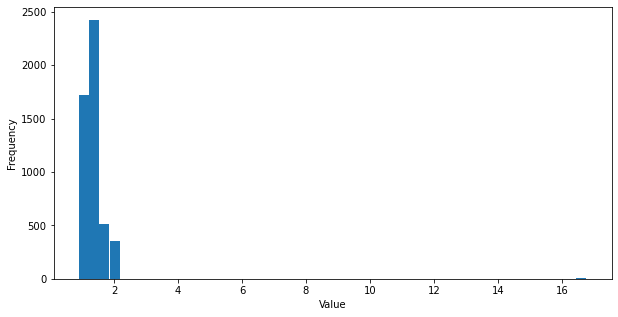

In [19]:
# histogram plot
plt.hist(leftdf, bins = 50);
# add x and y axis label
plt.xlabel('Value');
plt.ylabel('Frequency');

In [22]:
# find the value greater than 16
abnormal = leftdf.apply(lambda x: x>16)
print(abnormal)
leftdf[abnormal]

0       False
1       False
2       False
3       False
4       False
        ...  
5211    False
5213    False
5214    False
5215    False
5216    False
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 5018, dtype: bool


120    16.600
121    16.565
122    16.595
123    16.686
124    16.767
125    16.764
126    16.633
127    16.603
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, dtype: float64

## Now, we find all wrong values(non-number-strings and abnormal numbers). What should we do next?
### Replace them with other values OR just get rid of the wrong values
To deal with the wrong values, generally, you can choose either of the above methods. But there are some pros and cons for these two method:

For Replaceing wrong values, you need to carefully decide what values you will put into the cells. without careful consideration, the cleaned data may have a negative influence on your future analysis.

For getting rid of the wrong values, sometimes you will end up with few observations without any wrong values.

Here, we will show both methods.

## Replacing methods

In [23]:
# Replacing wrong values with a constant value. We will replace those wrong values with 1.6
# let's define a functions that can help use do this
# cell is the value in that cell
# value is the constant value
def ReplaceWithConstantValue(cell,value = 1.6):
    try:
        newcell = float(cell)
        if newcell > 16:
            return(value)
        return(newcell)
    except:
        return(value)


In [24]:
# apply the function
newcol = df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].apply(lambda x: ReplaceWithConstantValue(x))
# check the data type
newcol[1].dtype

dtype('float64')

### Now we can plot the new column to check

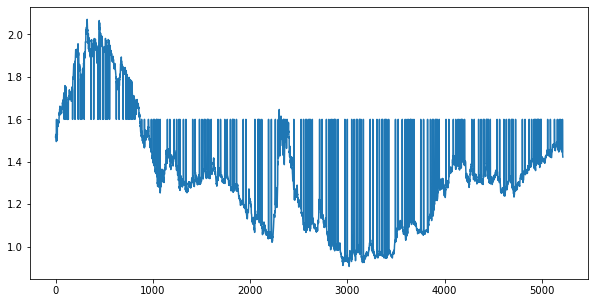

In [25]:
# plot new column
plt.plot(newcol)

### We can find that the values are in a reasonable range, but the values are not consistent. 
We will provide another way to replace the wrong values with a dynamic value (imputed value)

In [26]:
# Still first define a function to help us do the replacement
# This function will replace the wrong values with the last correct value
# cell is the value in that cell
# value will be used if the first cell is a wrong value
def ReplaceWithDynamicValue(cell, value = 1.6):
    # initialize the lastvalue if it doesn't exist yet
    if not hasattr(ReplaceWithDynamicValue, "lastvalue"):
        ReplaceWithDynamicValue.lastvalue = value
    try:
        newcell = float(cell)
        if newcell > 16:
            newcell = ReplaceWithDynamicValue.lastvalue
    except:
            newcell = ReplaceWithDynamicValue.lastvalue
    
    ReplaceWithDynamicValue.lastvalue = newcell
    return(newcell)

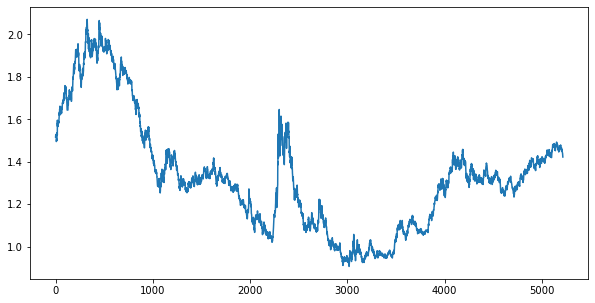

In [27]:
# apply the function
newcol = df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].apply(lambda x: ReplaceWithDynamicValue(x))
# plot the new column
plt.plot(newcol)

Now, the plot looks consistent and good. Next, we will show the getting rid of wrong values method.

## Getting rid of the wrong values method

In [ ]:
# Define a function to generate a mask for us to select those correct values
def MaskCorrectValue(cell):
    try:
        newcell = float(cell)
        if newcell > 16:
            return(False)
        return(True)
    except:
        return(False)

In [ ]:
# Using a mask to filter those correct data
mask = df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].apply(lambda x: MaskCorrectValue(x))
df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'][mask]

In [ ]:
# The original column.
df['AUSTRALIA - AUSTRALIAN DOLLAR/US$']

So, we can find that we remove 207 observations (199 non-numeric values and 8 numeric values greater than 16)